In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('news.csv')

In [8]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
 # Basic info
print("Dataset Info:\n")
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [13]:
 # Summary statistics
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Summary Statistics:

          Unnamed: 0                          title  \
count    6335.000000                           6335   
unique           NaN                           6256   
top              NaN  OnPolitics | 's politics blog   
freq             NaN                              5   
mean     5280.415627                            NaN   
std      3038.503953                            NaN   
min         2.000000                            NaN   
25%      2674.500000                            NaN   
50%      5271.000000                            NaN   
75%      7901.000000                            NaN   
max     10557.000000                            NaN   

                                                     text label  
count                                                6335  6335  
unique                                               6060     2  
top     Killing Obama administration rules, dismantlin...  REAL  
freq                                                 

In [14]:
#  Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [15]:
# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
# Label distribution
print("\nLabel Distribution:\n")
print(df['label'].value_counts())



Label Distribution:

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


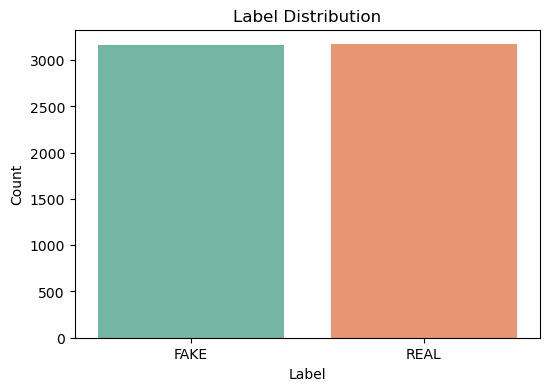

In [17]:
# Visualize label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


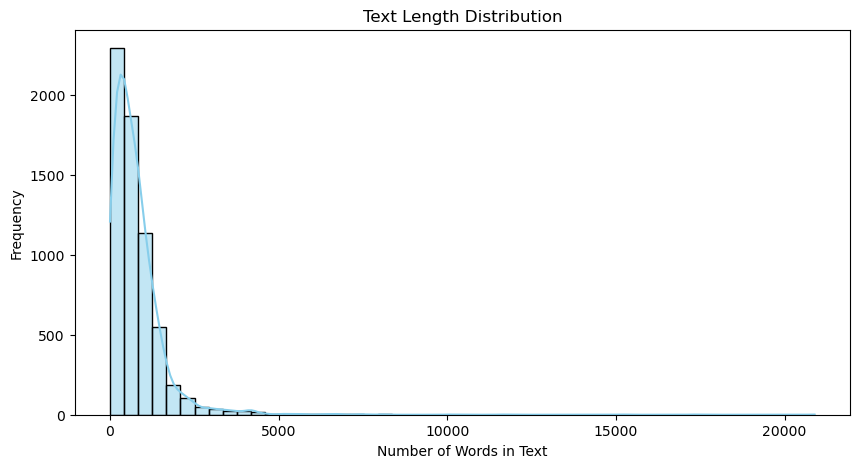

In [18]:
#  Text length distribution
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['text_len'], bins=50, kde=True, color='skyblue')
plt.title("Text Length Distribution")
plt.xlabel("Number of Words in Text")
plt.ylabel("Frequency")
plt.show()

/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


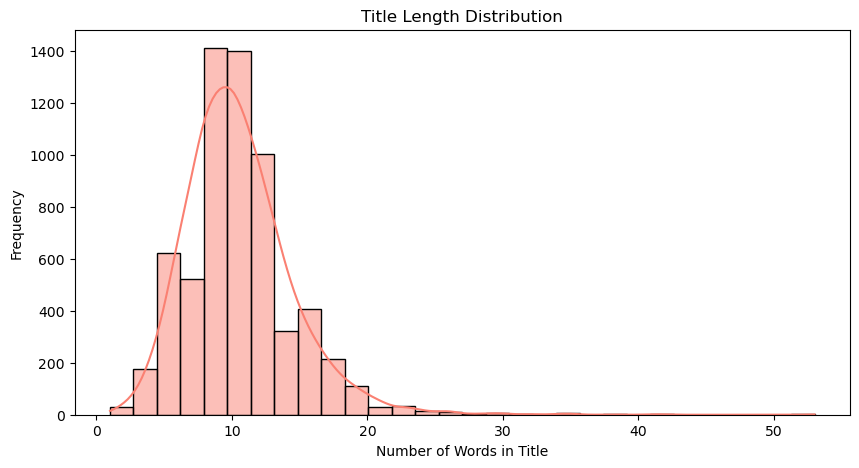

In [19]:
# Title length distribution
df['title_len'] = df['title'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['title_len'], bins=30, kde=True, color='salmon')
plt.title("Title Length Distribution")
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Check for duplicate titles/texts
print("\nDuplicate Titles:", df['title'].duplicated().sum())
print("Duplicate Texts:", df['text'].duplicated().sum())


Duplicate Titles: 79
Duplicate Texts: 275


In [21]:
# View some duplicate text samples
duplicates = df[df.duplicated(subset='text')]
print("\nSample Duplicate Texts:\n", duplicates[['title', 'text']].head())


Sample Duplicate Texts:
                                                  title  \
61         Biden makes another surprise political stop   
90    Exclusive: GOP campaigns plot revolt against RNC   
157        How Clinton plans to stop Sanders' momentum   
233  Scott Walker, Rick Perry show limits of super ...   
316                            Rand Paul is flatlining   

                                                  text  
61   On this day in 1973, J. Fred Buzhardt, a lawye...  
90   Killing Obama administration rules, dismantlin...  
157  Killing Obama administration rules, dismantlin...  
233  On this day in 1973, J. Fred Buzhardt, a lawye...  
316  Killing Obama administration rules, dismantlin...  


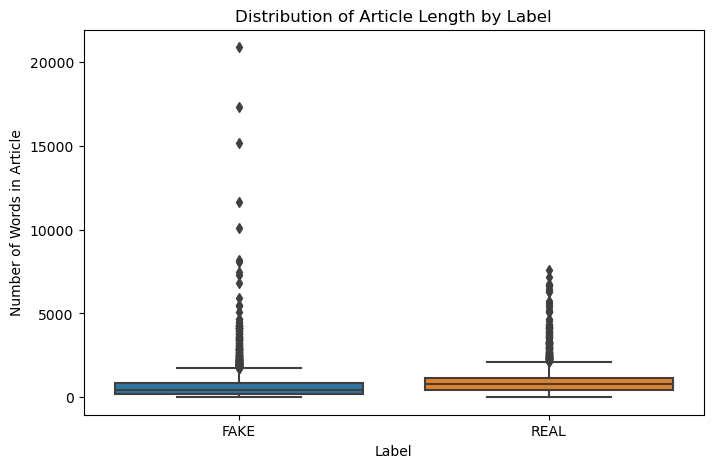

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_len', data=df)
plt.title("Distribution of Article Length by Label")
plt.ylabel("Number of Words in Article")
plt.xlabel("Label")
plt.show()

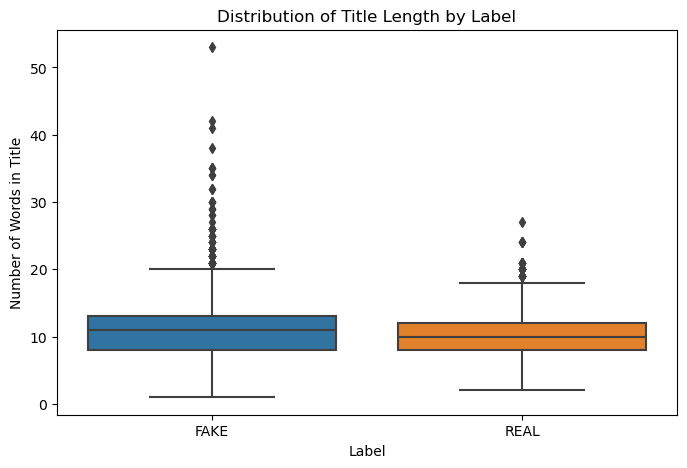

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='title_len', data=df)
plt.title("Distribution of Title Length by Label")
plt.ylabel("Number of Words in Title")
plt.xlabel("Label")
plt.show()

/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/avroop/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


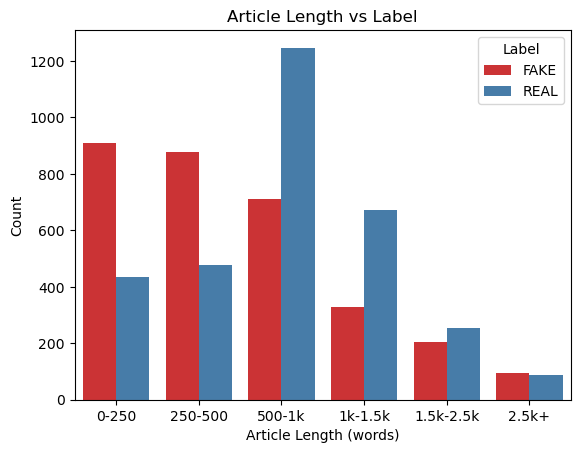

In [24]:

# Binning word counts
df['text_bins'] = pd.cut(df['text_len'], bins=[0, 250, 500, 1000, 1500, 2500, 10000],
                         labels=["0-250", "250-500", "500-1k", "1k-1.5k", "1.5k-2.5k", "2.5k+"])

sns.countplot(x='text_bins', hue='label', data=df, palette='Set1')
plt.title("Article Length vs Label")
plt.xlabel("Article Length (words)")
plt.ylabel("Count")
plt.legend(title='Label')
plt.show()
